In [1]:
import pandas as pd 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet')

In [3]:
#Q1
len(df.columns)

19

In [4]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.trip_duration = df.trip_duration.apply(lambda td: td.total_seconds() / 60)

In [5]:
#Q2
df['trip_duration'].std()

46.44530513776499

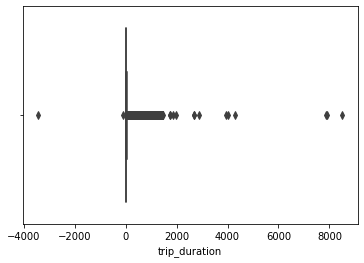

In [6]:
sns.boxplot(df['trip_duration'])

In [7]:
outlier_df = df[(df['trip_duration']>=1)&(df['trip_duration']<=60)]
outlier_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5.966667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10.650000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11.000000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,12.050000


In [8]:
#Q3
len(outlier_df['trip_duration'])/len(df['trip_duration'])*100

98.27547930522405

In [9]:
df = df[(df['trip_duration']>=1)&(df['trip_duration']<=60)]
categorical = ['PULocationID', 'DOLocationID']

df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [10]:
#Q4
X_train.shape

(2421440, 515)

In [11]:
target = 'trip_duration'
y_train = df[target].values
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [12]:
#Q5
mean_squared_error(y_train, y_pred, squared=False)

6.98619013596008

In [13]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['trip_duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.trip_duration = df.trip_duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.trip_duration >= 1) & (df.trip_duration <= 60)]
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    return df

In [14]:
df_train = read_dataframe('yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('yellow_tripdata_2022-02.parquet')

In [15]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [16]:
categorical = ['PU_DO']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [18]:
target = 'trip_duration'
y_train = df_train[target].values
y_val = df_val[target].values
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

In [19]:
#Q6
mean_squared_error(y_val, y_pred, squared=False)

5.4151200193710505